<a href="https://colab.research.google.com/github/nitinfaye/Medical-survey-Analysis/blob/main/sparkcognitions_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment submission**

**NItin Faye**

#Exercise 1: Data Preparation and Preprocessing

You have been provided with medical survey data that includes responses from an initial screening
(demographic questionnaire), as well as a follow-up medical examination (blood pressure) with lab tests
(cholesterol). This data is a subset taken from the NHANES 2005-2006 Survey and provided in the SAS
XPT format. You can refer to the CDC website at https://wwwn.cdc.gov/Nchs/Nhanes/ and the links
below for detailed descriptions of the features in each dataset.

Please clean and prepare the dataset for modeling, incorporating the following instructions.
Datasets:
1
Dataset Link to files Description
Demographics DEMO_D.csv
DEMO_RETIRED.csv
https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/DE
MO_D.htm
Blood Pressure BPX_D.csv https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/BP
X_D.htmInstructions:
1. Use python to load DEMO_D.csv, BPX_D.csv, and TCHOL_D.csv as pandas data frames.
Merge the 3 datasets but keep only the records that appear in all 3 datasets.
2. The existing features RIDAGEMN and RIDAGEEX contain the age of the respondent at screening
and examination, respectively; however, both contain some missing values.
a. Create a new feature AGE_AT_SCREENING with no missing values that contains the
most precise estimate of each respondent’s age (in months) at the time of screening.
Choose an appropriate strategy to estimate the missing values and explain your
reasoning.
b. Create a second feature AGE_AT_EXAM with no missing values that contains the most
precise estimate of each respondent’s age (in months) at the time of the follow-up
examination. Choose an appropriate strategy to estimate the missing values and explain
your reasoning.
3. The existing features DMDEDUC3 and DMDEDUC2 contain categorical responses for each
respondent’s highest level of education completed: however, the categories are somewhat
overlapping and complicated.
a. Create a new categorical feature HIGHEST_EDUCATION with the following categories:
ELEMENTARY (did not graduate HS, or currently in grades K-12), HIGHSCHOOL
(graduated or GED), and COLLEGE (4 year graduates only). This feature should reflect
the highest level of education completed for each respondent, from among the 3
options. Choose an appropriate strategy to fill in any missing values and explain your
reasoning.
4. The file DEMO_RETIRED.CSV contains a single feature named RETIRED which is a binary flag
indicating whether the respondent is retired (1) or not (0). This feature has some missing values.
a. Suggest an appropriate strategy to fill in the missing values. Justify your approach using
graphs or statistics.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df_BPX =pd.read_csv("/content/BPX_D.csv")
df_DEMO =pd.read_csv("/content/DEMO_D.csv")
df_TCHOL =pd.read_csv("/content/TCHOL_D.csv")

In [ ]:
df_BPX.head()

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A
0,31127.0,1.0,41.0,NaN,100.0,NaN
1,31128.0,1.0,401.0,NaN,NaN,2.0
2,31129.0,1.0,664.0,NaN,NaN,1.0
3,31130.0,2.0,NaN,4.0,NaN,2.0
4,31131.0,1.0,827.0,NaN,NaN,2.0


In [ ]:
df_DEMO.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL
0,31127.0,4.0,2.0,1.0,11.0,12.0,5.397605e-79,3.0,NaN,NaN,NaN
1,31128.0,4.0,2.0,2.0,132.0,132.0,1.100000e+01,4.0,4.0,NaN,1.0
2,31129.0,4.0,2.0,1.0,189.0,190.0,1.500000e+01,4.0,10.0,NaN,1.0
3,31130.0,4.0,2.0,2.0,NaN,NaN,8.500000e+01,3.0,NaN,4.0,NaN
4,31131.0,4.0,2.0,2.0,535.0,536.0,4.400000e+01,4.0,NaN,4.0,NaN


In [ ]:
df_TCHOL.head()

,SEQN,LBXTC,LBDTCSI
0,31128.0,129.0,3.34
1,31129.0,170.0,4.40
2,31130.0,NaN,NaN
3,31131.0,105.0,2.72
4,31132.0,147.0,3.80


missing values

In [ ]:
df_BPX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9950 entries, 0 to 9949
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9950 non-null   float64
 1   PEASCST1  9950 non-null   float64
 2   PEASCTM1  9641 non-null   float64
 3   PEASCCT1  438 non-null    float64
 4   BPXCHR    2168 non-null   float64
 5   BPQ150A   7455 non-null   float64
dtypes: float64(6)
memory usage: 466.5 KB


In [ ]:
df_BPX.fillna(0)

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A
0,31127.0,1.0,41.0,0.0,100.0,0.0
1,31128.0,1.0,401.0,0.0,0.0,2.0
2,31129.0,1.0,664.0,0.0,0.0,1.0
3,31130.0,2.0,0.0,4.0,0.0,2.0
4,31131.0,1.0,827.0,0.0,0.0,2.0
...,...,...,...,...,...,...
9945,41470.0,1.0,59.0,0.0,112.0,0.0
9946,41471.0,1.0,703.0,0.0,0.0,2.0
9947,41472.0,1.0,567.0,0.0,0.0,2.0
9948,41473.0,1.0,645.0,0.0,0.0,2.0


In [ ]:
df_BPX.isnull()

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A
0,False,False,False,True,False,True
1,False,False,False,True,True,False
2,False,False,False,True,True,False
3,False,False,True,False,True,False
4,False,False,False,True,True,False
...,...,...,...,...,...,...
9945,False,False,False,True,False,True
9946,False,False,False,True,True,False
9947,False,False,False,True,True,False
9948,False,False,False,True,True,False


In [ ]:
new_data = df_DEMO[['RIDAGEMN','RIDAGEEX']]
new_data.head()

,RIDAGEMN,RIDAGEEX
0,11.0,12.0
1,132.0,132.0
2,189.0,190.0
3,NaN,NaN
4,535.0,536.0


In [ ]:
new_df =new_data.dropna()
new_df.head()

,RIDAGEMN,RIDAGEEX
0,11.0,12.0
1,132.0,132.0
2,189.0,190.0
4,535.0,536.0
5,842.0,843.0


In [ ]:
df_new = new_df.rename(columns={'RIDAGEMN':'AGE_AT_SCREENING','RIDAGEEX':'AGE_AT_EXAM'})
df_new.head()

,AGE_AT_SCREENING,AGE_AT_EXAM
0,11.0,12.0
1,132.0,132.0
2,189.0,190.0
4,535.0,536.0
5,842.0,843.0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9777 entries, 0 to 10347
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AGE_AT_SCREENING  9777 non-null   float64
 1   AGE_AT_EXAM       9777 non-null   float64
dtypes: float64(2)
memory usage: 229.1 KB


In [ ]:
df_new.describe()

,AGE_AT_SCREENING,AGE_AT_EXAM
count,9.777000e+03,9.777000e+03
mean,3.295992e+02,3.304138e+02
std,2.770617e+02,2.770763e+02
min,5.397605e-79,5.397605e-79
25%,1.090000e+02,1.100000e+02
50%,2.270000e+02,2.270000e+02
75%,5.270000e+02,5.280000e+02
max,1.019000e+03,1.019000e+03


In [ ]:
new_data1 = df_DEMO[['DMDEDUC3','DMDEDUC2']]
new_data1.head()

,DMDEDUC3,DMDEDUC2
0,NaN,NaN
1,4.0,NaN
2,10.0,NaN
3,NaN,4.0
4,NaN,4.0


In [ ]:
new_df1 =new_data1.fillna(0)
new_df1.head()

,DMDEDUC3,DMDEDUC2
0,0.0,0.0
1,4.0,0.0
2,10.0,0.0
3,0.0,4.0
4,0.0,4.0


In [ ]:
new_df1.describe()

,DMDEDUC3,DMDEDUC2
count,10348.000000,10348.000000
mean,2.514109,1.578083
std,5.604339,1.870710
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,4.000000,3.000000
max,99.000000,9.000000


In [ ]:
df_DEMO_RETIRED = pd.read_csv("/content/DEMO_RETIRED.CSV")
df_DEMO_RETIRED.head()

,SEQN,RETIRED
0,31127.0,NaN
1,31128.0,0.0
2,31129.0,0.0
3,31130.0,1.0
4,31131.0,0.0


In [ ]:
df_DEMO_RETIRED.fillna(0)

,SEQN,RETIRED
0,31127.0,0.0
1,31128.0,0.0
2,31129.0,0.0
3,31130.0,1.0
4,31131.0,0.0
...,...,...
10343,41470.0,0.0
10344,41471.0,0.0
10345,41472.0,0.0
10346,41473.0,0.0


#Exercise 2: Model Building
Please complete the following exercise in the same file as the other exercises, using comments in your
code to explain your reasoning.
An auto-insurance company is revamping its pricing model. The analyst developing the new price model
believes that the best approach is to develop 2 models: one for customers who are likely to file an
insurance claim within the first year of their contract and another one for all other customers. The
analyst has prepared a clean dataset consisting of 10,000 customers and 10 engineered features which
capture driving behavior. The data has already been preprocessed for you (i.e., no missing data, no
outliers, data is scaled, no correlated features, and the classes are fairly balanced).
The data is contained in claim_prediction.csv, where CLAIM = 1 means the customer filed a claim in the
first year and CLAIM = 0 means the customer did not.
Develop a model to predict if customers will file a claim in their first year based on their driving
behavior.
In addition to submitting your code, use comments to explain the decisions you made and how well you
expect this model to perform on new data from a similar customer pool (and why).
Note that you are being evaluated on your model building and validation workflow, rather than on the
complexity of your solution.

In [ ]:
df_clam= pd.read_csv("/content/claim_prediction.csv")
df_clam.head()

,EADDC,EAFXA,FDDBC,AFDDA,AXCXA,EXCCE,FBXFC,DFFEC,CEXAE,BBADX,CLAIM
0,-0.193513,0.021062,-0.870351,4.314903,-4.260162,-1.259531,0.175603,-0.942903,2.333260,4.678712,0
1,2.667844,-3.195978,2.718651,-0.885312,2.964261,2.161336,2.008505,-0.296360,-0.610780,-2.545978,1
2,2.280602,0.048539,-2.179863,-0.380866,-1.212960,2.097278,5.131315,-1.250050,2.362880,2.207307,0
3,0.592376,-1.590548,2.329976,-1.416489,1.743390,3.040990,2.371740,-0.190549,0.890761,-2.671923,0
4,1.236896,-0.656180,-0.381064,-2.332379,0.660684,2.055621,0.478162,-0.269513,2.614886,-3.655301,0


In [ ]:
X= df_clam.iloc[:, :-1].values
y =df_clam.iloc[:, -1].values

In [ ]:
print(X)

[[-0.1935126   0.02106198 -0.87035075 ... -0.94290259  2.33325965
   4.6787125 ]
 [ 2.66784441 -3.19597822  2.71865129 ... -0.2963597  -0.61077998
  -2.54597797]
 [ 2.28060208  0.04853918 -2.17986312 ... -1.25005024  2.36287982
   2.20730688]
 ...
 [-4.36047216 -1.57425114  0.01748171 ...  0.22001164 -1.72467725
   2.50808163]
 [ 1.52426    -0.94803973 -0.74629288 ... -2.27439929  3.43180748
   1.36187212]
 [-2.92119012 -0.23252674 -1.55985357 ... -0.57480207  0.34713135
   0.13507797]]


In [ ]:
print(y)

[0 1 0 ... 1 1 1]


Splititng the dataset into the Trainig set and Iest set

Featuring Scalling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

training ANN module

In [ ]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Compilling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.6471 - accuracy: 0.6143
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5255 - accuracy: 0.7679
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.8169
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4413 - accuracy: 0.8320
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.8394
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.8453
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8497
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8516
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 0.8549
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4019 - accura

precdict the test result

In [ ]:
y_pred =ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 1]]


confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm =confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[875 126]
 [124 875]]


0.875

#Exercise 3: Model Evaluation
Please respond to the following short answer questions, numbered in the same file as other exercises.
1. What is one way to determine the number of clusters in K-Means clustering? How would you
estimate the efficacy, or quality, of the K-means clustering results?

  ANS-
1	Elbow method
2	X-means clustering
3	Information criterion approach
4	Information–theoretic approach
5	Silhouette method
6	Cross-validation
7	Finding number of clusters in text databases
8	Analyzing the kernel matrix
9	References
10	Further reading
11	External links

 The estimate the quality of the K-means clustering result depend on algorithms out pur show in centroid .

2. Your linear regression model is suffering from low bias and high variance. What steps can you
take to improve your model?

 Ans- For instances of Low Bias in your machine learning model, you can try decresing  the number of input features.
 then in the opposite scenario of High Variance, you can reduce the number of input features.

3. Below is a scenario for training error (TE) and validation error (VE) for several iterations of a
machine learning model. Which model would you choose, and why?

 Ans- In the previous section, we saw the basic recipe for applying a      supervised machine learning model:

 Choose a class of model
 Choose model hyperparameters
Fit the model to the training data
Use the model to predict labels for new data
4. You have built a model for a binary classification problem. The trained model was applied to the
validation dataset and produced the results documented in the following confusion matrix.
a. Calculate Recall, Precision and F-1 score.
b. If your classifier model is attempting to predict cancer in patients. Which type of error
should you focus on for this type of problem? Which evaluation metric would you
choose and why?
c. If your classifier model is attempting to determine whether or not to recommend a
YouTube video. Which type of error should you focus on for this type of problem? Which
evaluation metric would you choose and why?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=20)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# make class predictions
y_pred = model.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print(f'ACCURACY:{accuracy}')
print('\n')
# generate classification report
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

ACCURACY:0.874


              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1001
           1       0.88      0.87      0.87       999

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



#Exercise 4: Anomaly Detection
Please complete the following exercise in the same file as the other exercises, using comments in your
code to explain your reasoning.
An oil and gas company with several offshore platforms is experimenting with anomaly detection on one
of its platforms. An analyst has provided you with sample data for the pilot platform
(anomaly_detection.csv). The data is a time series dataset, consisting of average daily readings from 5
sensors between 01/01/2016 and 12/30/2016. You can assume that data preprocessing (filling missing
values, scaling, etc) has been handled by the analyst. You can also assume that the daily readings are
independent and identically distributed.
The analyst has reviewed operation notes for the first 9 months (01/01/2016 to 09/30/2016) and
identified that there were issues on the platform between 02/14/2016 and 02/21/2016. The analyst did
not have time to review the final 3 months of data.
Use the first 9 months of data (01/01/2016 to 09/30/2016) to develop an anomaly detection model and
test it on the final 3 months of data (10/01/2016 to 12/30/2016). How many anomalous periods were
identified in the test period between 10/01/2016 and 12/30/2016? Only report anomalies that last
longer than 2 days. Additionally, if an anomaly lasts for longer than 14 days, we consider that behavior
to be the new normal, and we do not report it.
Hint: There are multiple potential approaches to solving this problem. One acceptable solution to this
problem is to train a PCA model on normal data. Given new data, risk can be computed as the difference
between the input data and reconstructed data, where reconstructed data is the result of compressing
and decompressing the input data using PCA.

In [ ]:
df_ano = pd.read_csv('/content/anomaly_detection.csv')
df_ano.head()

,CEACC,CCDEF,FAXAE,FBFFD,EDDAB
0,0.000000,0.000000,3.000000,3.000000,8.000000
1,1.232260,-0.217305,3.193780,3.489992,7.792553
2,2.540129,0.606709,3.180950,3.464811,7.817440
3,5.520271,1.470812,3.330528,2.968375,7.409152
4,5.914298,2.745060,3.061706,3.440980,7.153049


In [ ]:
df_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CEACC   365 non-null    float64
 1   CCDEF   365 non-null    float64
 2   FAXAE   365 non-null    float64
 3   FBFFD   365 non-null    float64
 4   EDDAB   365 non-null    float64
dtypes: float64(5)
memory usage: 14.4 KB


In [ ]:
df_ano.isnull()

,CEACC,CCDEF,FAXAE,FBFFD,EDDAB
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
360,False,False,False,False,False
361,False,False,False,False,False
362,False,False,False,False,False
363,False,False,False,False,False


In [ ]:
df_ano.describe()

,CEACC,CCDEF,FAXAE,FBFFD,EDDAB
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,9.237768,4.443320,0.641819,4.684912,9.369973
std,4.795601,2.890635,1.844518,1.261149,1.237600
min,0.000000,-1.928240,-4.436065,2.130575,6.809182
25%,5.284511,2.334320,-0.686288,3.718403,8.535509
50%,8.478075,4.014063,0.864738,4.716682,9.413427
75%,12.312325,6.385877,2.161050,5.476941,10.223419
max,20.898647,12.194835,3.775713,8.477024,12.114621


In [ ]:
 df_ano['Date'] = pd.date_range(start='01/01/2016', periods=len(df_ano), freq='D')
 df_ano.tail()

,CEACC,CCDEF,FAXAE,FBFFD,EDDAB,Date
360,11.364339,-0.925751,-3.259216,6.572904,11.452315,2016-12-26
361,11.316572,-0.081164,-3.746738,6.252706,11.859704,2016-12-27
362,10.841367,-0.317127,-3.680397,6.617491,11.644486,2016-12-28
363,11.585932,-0.710426,-4.046116,6.519041,11.756765,2016-12-29
364,11.991952,-0.399588,-4.436065,6.155139,12.052701,2016-12-30


#Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
import plotly
import plotly.graph_objects as go
import plotly.express as px
plotly.io.renderers.default = 'colab'
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse,rmse,meanabs
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
import fbprophet
from fbprophet import Prophet
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import LSTM
from keras.utils import np_utils
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:

fig = px.bar(df_ano, x="Date", y="CEACC", color='CEACC', orientation='v', height=600,
             title='CEACC', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()


fig = px.bar(df_ano, x="Date", y="CCDEF", color='CCDEF', orientation='v', height=600,
             title='CCDEF', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(df_ano, x="Date", y="FAXAE", color='FAXAE', orientation='v', height=600,
             title='FAXAE', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(df_ano, x="Date", y="FBFFD", color='FBFFD', orientation='v', height=600,
             title='FBFFD', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()


fig = px.bar(df_ano, x="Date", y="EDDAB", color='EDDAB', orientation='v', height=600,
             title='EDDAB', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()


In [ ]:
fig = go.Figure()
#Plotting datewise cases
fig.add_trace(go.Scatter(x=df_ano['Date'], y=df_ano['CEACC'], mode='lines+markers', name='CEACC',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=df_ano['Date'], y=df_ano['CCDEF'], mode='lines+markers', name='CCDEF', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=df_ano['Date'], y=df_ano['FAXAE'], mode='lines+markers', name='FAXAE', line=dict(color='Green', width=2)))
fig.add_trace(go.Scatter(x=df_ano['Date'], y=df_ano['FBFFD'], mode='lines+markers', name='FBFFD',line=dict(color='orange', width=2)))
fig.add_trace(go.Scatter(x=df_ano['Date'], y=df_ano['EDDAB'], mode='lines+markers', name='EDDAB',line=dict(color='purple', width=2)))
fig.update_layout(title='CEACC,CCDEF,FAXAE,FBFFD,EDDAB', xaxis_tickfont_size=14,yaxis=dict(title='Number of anomaly'))

fig.show()

#Building Forecasting Models by applying different algorithms

In [ ]:
sensors_total=df_ano[['Date','CEACC']]
sensors_total.head()

,Date,CEACC
0,2016-01-01,0.000000
1,2016-01-02,1.232260
2,2016-01-03,2.540129
3,2016-01-04,5.520271
4,2016-01-05,5.914298


In [ ]:
#Defining function for monthly  cases
def sensors_cases(data):
    sensors_data = data.copy()
    sensors_data.Date = sensors_data.Date.apply(lambda x: str(x)[:-3])
    sensors_data = sensors_data.groupby('Date')['CEACC'].sum().reset_index()
    sensors_data.Date = pd.to_datetime(sensors_data.Date)
    return sensors_data

In [ ]:
sensors_df = sensors_cases(sensors_total)
sensors_df.fillna(0)
sensors_df.head()

,Date,CEACC
0,2016-01-01,0.000000
1,2016-01-02,1.232260
2,2016-01-03,2.540129
3,2016-01-04,5.520271
4,2016-01-05,5.914298


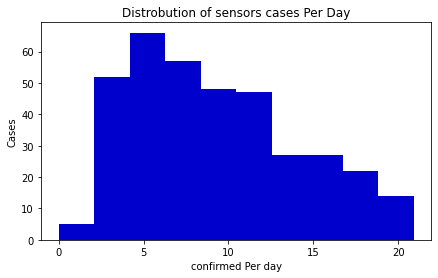

In [ ]:
#Defining function for monthly  cases per day
def confirmed_cases_per_day():
    fig, ax = plt.subplots(figsize=(7,4))
    plt.hist(sensors_df.CEACC, color='mediumblue')
    
    ax.set(xlabel = "confirmed Per day",
           ylabel = "Cases",
           title = "Distrobution of sensors cases Per Day")
    
confirmed_cases_per_day()

In [ ]:
# Average monthly sensors cases 
avg_Sensors_cases = sensors_df.CEACC.mean()
print(f"Overall average sensors cases: {avg_Sensors_cases}cases")   #Prasanta - please check the data format


Overall average sensors cases: 9.237768426791225cases


##Determining 'Stationarity' of Time series data

In [ ]:
#Defining function for time series analysis
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x_col, y_col, data=data, ax=ax, color='mediumblue', label='Total cases')
    
    second = data.groupby(data.Date.dt.year)[y_col].mean().reset_index()
    second.Date = pd.to_datetime(second.Date, format='%Y')
    sns.lineplot((second.Date + datetime.timedelta(365/12)), y_col, data=second, ax=ax, color='red', label='Mean cases')   
    
    ax.set(xlabel = "Date",
           ylabel = "sensors",
           title = title)
    
    sns.despine()

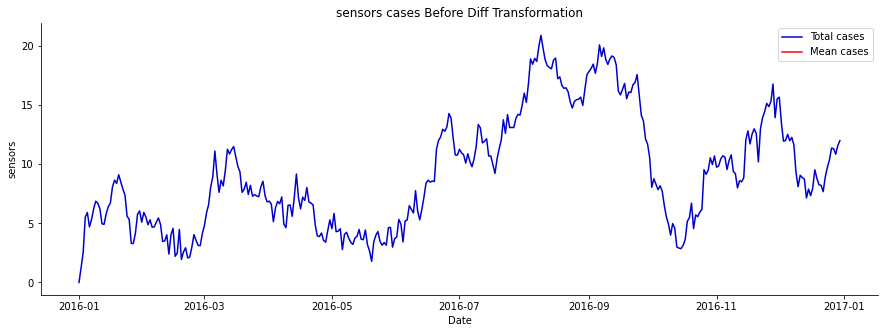

In [ ]:
time_plot(sensors_df, 'Date', 'CEACC','sensors cases Before Diff Transformation')

In [ ]:
#Defining function for differencing? Please check
def get_diff(data):
    data['CEACC_diff'] = data.CEACC.diff()
    data = data.dropna()
    
    return data

In [ ]:
stationary_df = get_diff(sensors_df)
stationary_df

,Date,CEACC,CEACC_diff
1,2016-01-02,1.232260,1.232260
2,2016-01-03,2.540129,1.307869
3,2016-01-04,5.520271,2.980142
4,2016-01-05,5.914298,0.394027
5,2016-01-06,4.698122,-1.216176
...,...,...,...
360,2016-12-26,11.364339,1.004910
361,2016-12-27,11.316572,-0.047767
362,2016-12-28,10.841367,-0.475205
363,2016-12-29,11.585932,0.744565


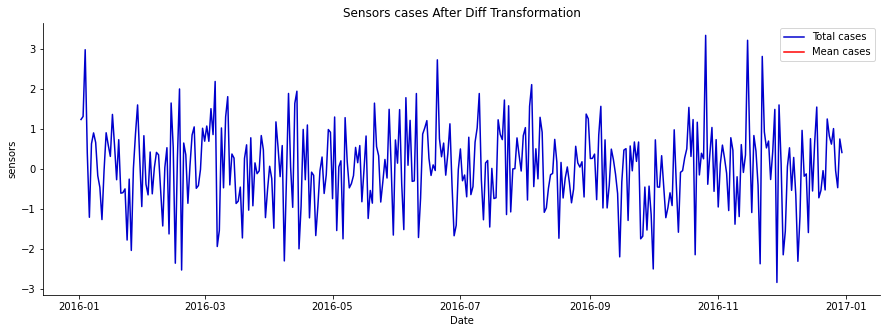

In [ ]:
time_plot(stationary_df, 'Date', 'CEACC_diff', 'Sensors cases After Diff Transformation')

##Visualizing Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) of time series

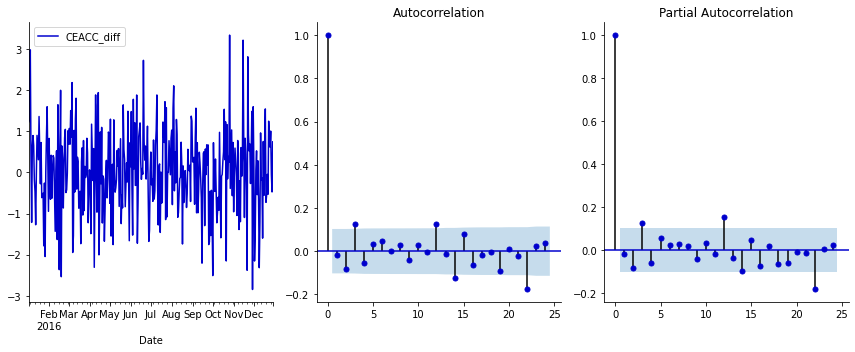

In [ ]:
def plots(data, lags=None):
    
    # Convert dataframe to datetime index
    dt_data = data.set_index('Date').drop('CEACC', axis=1)
    dt_data.dropna(axis=0)
    
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    dt_data.plot(ax=raw, figsize=(12, 5), color='mediumblue')
    smt.graphics.plot_acf(dt_data, lags=lags, ax=acf, color='mediumblue')
    smt.graphics.plot_pacf(dt_data, lags=lags, ax=pacf, color='mediumblue')
    sns.despine()
    plt.tight_layout()

plots(stationary_df, lags=24);  

Preparing Dataset Modeling

##Preparing Dataset Modeling

In [ ]:
#create dataframe for transformation from time series to supervised
def generate_supervised(data):
    supervised_df = data.copy()
    
    #create column for each lag
    for i in range(1,13):
        col_name = 'lag_' + str(i)
        supervised_df[col_name] = supervised_df['CEACC_diff'].shift(i)
    
    #drop null values
    supervised_df = supervised_df.dropna().reset_index(drop=True)
    
   
    
    return supervised_df

In [ ]:
model_df = generate_supervised(stationary_df)
model_df.head()

,Date,CEACC,CEACC_diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2016-01-14,5.810582,0.900257,-0.048291,-1.273207,-0.467511,-0.175423,0.656381,0.896844,0.623412,-1.216176,0.394027,2.980142,1.307869,1.232260
1,2016-01-15,6.403127,0.592544,0.900257,-0.048291,-1.273207,-0.467511,-0.175423,0.656381,0.896844,0.623412,-1.216176,0.394027,2.980142,1.307869
2,2016-01-16,6.711306,0.308179,0.592544,0.900257,-0.048291,-1.273207,-0.467511,-0.175423,0.656381,0.896844,0.623412,-1.216176,0.394027,2.980142
3,2016-01-17,8.070888,1.359582,0.308179,0.592544,0.900257,-0.048291,-1.273207,-0.467511,-0.175423,0.656381,0.896844,0.623412,-1.216176,0.394027
4,2016-01-18,8.653984,0.583096,1.359582,0.308179,0.592544,0.900257,-0.048291,-1.273207,-0.467511,-0.175423,0.656381,0.896844,0.623412,-1.216176


In [ ]:
#Defining function for data preprocessing for ARIMA
def generate_arima_data(data):
    dt_data = stationary_df.set_index('Date').drop('CEACC', axis=1) 
    dt_data.dropna(axis=0)
    
    return dt_data

In [ ]:
datetime_df = generate_arima_data(stationary_df)
datetime_df.head()

,CEACC_diff
Date,
2016-01-02,1.232260
2016-01-03,1.307869
2016-01-04,2.980142
2016-01-05,0.394027
2016-01-06,-1.216176


In [ ]:
datetime_df.shape

(364, 1)

In [ ]:
#Function for Train-Test split
def tts(data):
    data = data.drop(['Date','CEACC'],axis=1)
    train, test = data[:-12].values, data[-12:].values 
    
    return train, test

train, test = tts(model_df)


In [ ]:
test.shape

(12, 13)

In [ ]:
#Function for sclaing the data 
def scale_data(train_set, test_set):
    #apply Min Max Scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train_set)
    
    # reshape training set
    train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
    train_set_scaled = scaler.transform(train_set)
    
    # reshape test set
    test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
    test_set_scaled = scaler.transform(test_set)
    
    X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1].ravel()
    X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1].ravel()
    
    return X_train, y_train, X_test, y_test, scaler

X_train, y_train, X_test, y_test, scaler_object = scale_data(train, test)

##Defining Functions for model building

In [ ]:
#Bringing the data back to original scale
def undo_scaling(y_pred, x_test, scaler_obj, lstm=False):  
    #reshape y_pred
    y_pred = y_pred.reshape(y_pred.shape[0], 1, 1)
    
    if not lstm:
        x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
    
    #rebuild test set for inverse transform
    pred_test_set = []
    for index in range(0,len(y_pred)):
        pred_test_set.append(np.concatenate([y_pred[index],x_test[index]],axis=1))
        
    #reshape pred_test_set
    pred_test_set = np.array(pred_test_set)
    pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
    
    #inverse transform
    pred_test_set_inverted = scaler_obj.inverse_transform(pred_test_set)
    
    return pred_test_set_inverted

In [ ]:

#Function for loading the original time series dataframe after converting to datetime object  
def load_original_df():
    #load in original dataframe without scaling applied
    original_df =  sensors_df     
    original_df.Date = original_df.Date.apply(lambda x: str(x)[:-3])
    original_df = original_df.groupby('Date')['CEACC'].sum().reset_index()
    original_df.Date = pd.to_datetime(original_df.Date)
    #df['Timestamp'] = pd.to_datetime(df['Year'],format='%Y') 
    return original_df

In [ ]:

#Function for time series prediction
def predict_df(unscaled_predictions, original_df):
    #create dataframe that shows the predicted cases
    result_list = []
    cases_dates = list(original_df[-14:].Date)   
    act_confirmed = list(original_df[-14:].CEACC) 

    for index in range(0,len(unscaled_predictions)):
        result_dict = {}
        result_dict['pred_value'] = int(unscaled_predictions[index][0] + act_confirmed[index])
        result_dict['Date'] = cases_dates[index+1]
        result_list.append(result_dict)
        
    df_result = pd.DataFrame(result_list)
        
    return df_result

In [ ]:
#Function for obtaining accuracy scores
model_scores = {}  

def get_scores(unscaled_df, original_df, model_name):
    rmse = np.sqrt(mean_squared_error(original_df.CEACC[-12:], unscaled_df.pred_value[-12:]))
    mae = mean_absolute_error(original_df.CEACC[-12:], unscaled_df.pred_value[-12:])
    r2 = r2_score(original_df.CEACC[-12:], unscaled_df.pred_value[-12:])
    model_scores[model_name] = [rmse, mae, r2]

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")

In [ ]:

#Function for visualizing the results for respective models
def plot_results(results, original_df, model_name):

    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(original_df.Date, original_df.CEACC, data=original_df, ax=ax,label='Original', color='mediumblue')
    sns.lineplot(results.Date, results.pred_value, data=results, ax=ax,label='Predicted', color='Red')
    
    ax.set(xlabel = "Date",
           ylabel = "CEACC",
           title = f"{model_name} Sensors Forecasting Prediction")
    
    ax.legend()
    
    sns.despine() 
    
    #plt.savefig(f'/content/{model_name}_forecast.png')

In [ ]:

#Function for executing the model to be used for comparison
def run_model(train_data, test_data, model, model_name):  
    
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    mod = model   #Here model represents the respective algorithms
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)
    
    # Undo scaling to compare predictions against original data
    original_df = load_original_df()
    unscaled = undo_scaling(predictions, X_test, scaler_object)
    unscaled_df = predict_df(unscaled, original_df)
      
    get_scores(unscaled_df, original_df, model_name)
    
    plot_results(unscaled_df, original_df, model_name)

##Linear Regression

RMSE: 1.497935324743325
MAE: 1.239803290286744
R2 Score: -0.07173582504979348


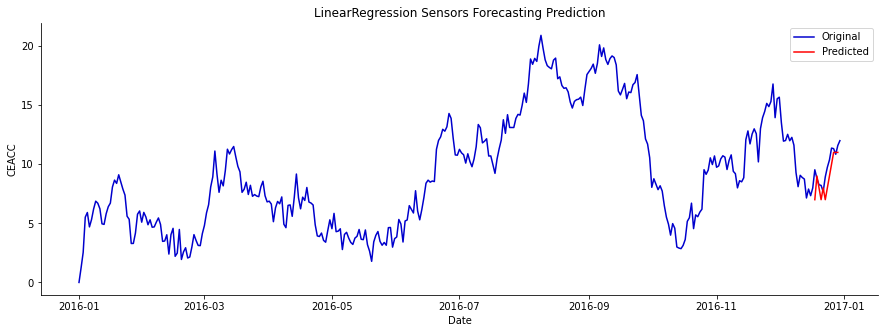

In [ ]:
#Applying Linear Regression on time series data
run_model(train, test, LinearRegression(), 'LinearRegression')

##Random Forest Regressor

RMSE: 1.4879365164122886
MAE: 1.2099481300459909
R2 Score: -0.05747577566443485


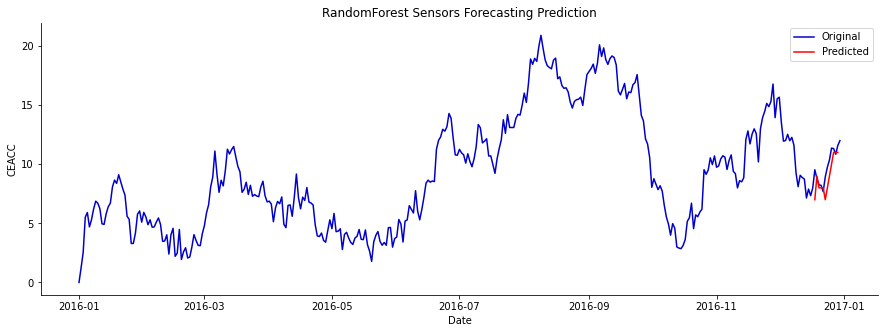

In [ ]:
#Applying Random Forest (RF) Regressor on time series data
run_model(train, test, RandomForestRegressor(n_estimators=100, max_depth=20),'RandomForest')





XGBoost Regressor

RMSE: 1.603865949668885
MAE: 1.3766147967126574
R2 Score: -0.22867708233585993


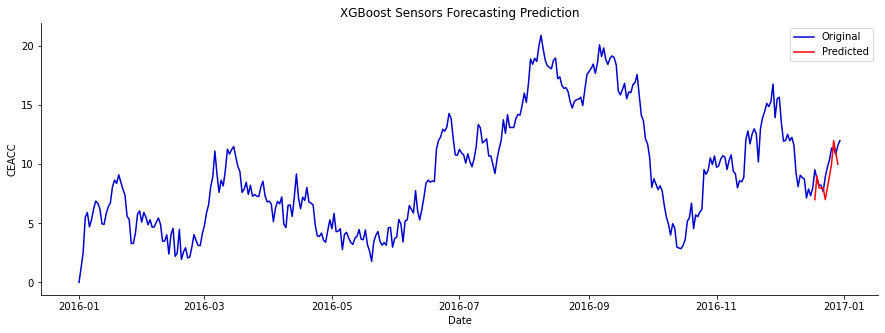

In [ ]:
#Applying XGBoost Regressor on time series data
run_model(train, test, XGBRegressor( n_estimators=100, learning_rate=0.2, objective='reg:squarederror'), 'XGBoost')


LSTM (Deep Learning) Model

In [ ]:
#Applying LSTM Model on time series data
#Function for Model build, training and prediction for LSTM Model
def lstm_model(train_data, test_data):
    
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
   
    model = Sequential()
    model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), 
                   stateful=True))
    model.add(Dense(1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, 
              shuffle=False)
    predictions = model.predict(X_test,batch_size=1)
    
    original_df =sensors_df
    unscaled = undo_scaling(predictions, X_test, scaler_object, lstm=True)
    unscaled_df = predict_df(unscaled, original_df)
    
    get_scores(unscaled_df, original_df, 'LSTM')
    
    plot_results(unscaled_df, original_df, 'LSTM')

Epoch 1/200
340/340 [==============================] - 18s 1ms/step - loss: 0.1060
Epoch 2/200
340/340 [==============================] - 1s 2ms/step - loss: 0.1047
Epoch 3/200
340/340 [==============================] - 0s 1ms/step - loss: 0.1039
Epoch 4/200
340/340 [==============================] - 1s 1ms/step - loss: 0.1033
Epoch 5/200
340/340 [==============================] - 1s 1ms/step - loss: 0.1028
Epoch 6/200
340/340 [==============================] - 1s 2ms/step - loss: 0.1022
Epoch 7/200
340/340 [==============================] - 1s 1ms/step - loss: 0.1017
Epoch 8/200
340/340 [==============================] - 1s 2ms/step - loss: 0.1011
Epoch 9/200
340/340 [==============================] - 1s 2ms/step - loss: 0.1005
Epoch 10/200
340/340 [==============================] - 1s 2ms/step - loss: 0.0998
Epoch 11/200
340/340 [==============================] - 1s 1ms/step - loss: 0.0991
Epoch 12/200
340/340 [==============================] - 1s 2ms/step - loss: 0.0983
Epoch 13/200

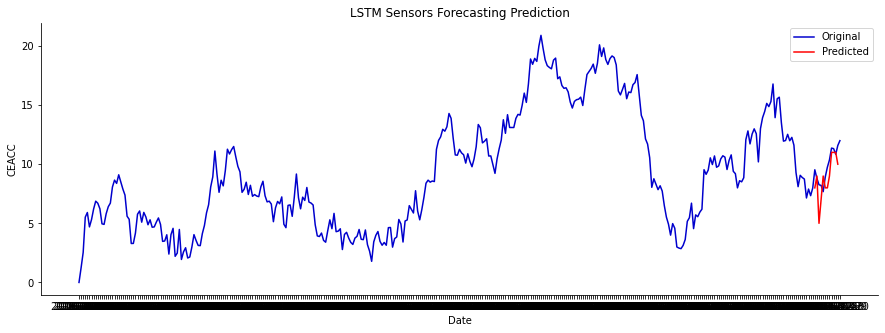

In [ ]:
lstm_model(train, test)

In [ ]:
pickle.dump(model_scores, open( "model_scores.p", "wb" ) )

##ARIMA Model

In [ ]:
%pip install pmdarima 

In [ ]:
from pmdarima import auto_arima

In [ ]:
ts_data = datetime_df.copy()

In [ ]:
ts_data.index = pd.to_datetime(ts_data.index) 
ts_data.reset_index(inplace=True)
ts_data.head()

,Date,CEACC_diff
0,2016-01-02,1.232260
1,2016-01-03,1.307869
2,2016-01-04,2.980142
3,2016-01-05,0.394027
4,2016-01-06,-1.216176


In [ ]:
train_data_arima = ts_data.iloc[:-12]  
test_data_arima=ts_data.iloc[-12:]    

In [ ]:
# With auto-arima we should be able to figure out p, d, q values 
#which can be used for defining model-arima() function
def model_arima(data):
  stepwise_fit = auto_arima(data['CEACC_diff'], start_p=0, start_q=0,     #Prasanta - Would it not be ts_data[]???
                          max_p=6, max_q=6, m=7,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)        # set to stepwise
  stepwise_fit.plot_diagnostics(figsize=(10, 8));    #Prasanta - why semi colon here?
  stepwise_fit.summary()
  

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1051.537, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1053.445, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1053.427, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1055.226, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1053.160, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.223 seconds


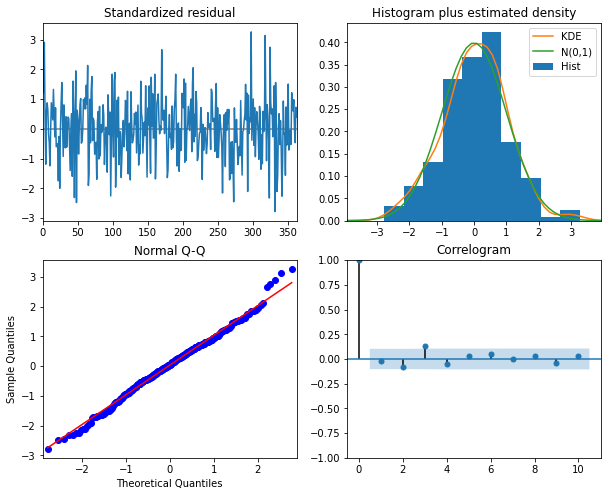

In [ ]:
model_arima(ts_data)

Note : Choose the lowest AIC value order

**Can we summarize the observations from the graphical plots**

In [ ]:
#Function for forecasting by ARIMA Model
def arima_predictions(train,test,p,d,q):
  order=(p,d,q)
  model_arima = ARIMA(train['CEACC_diff'].astype(float),order=order)
  results_arima = model_arima.fit()
  #  predictions
  start=len(train)
  end=len(train)+len(test)-1
  predictions_arima = results_arima.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(0,2,1) Predictions')
  get_scores_arima(test,predictions_arima)        
  plot_results(train,test, predictions_arima, 'Arima_forecast')   
  #ts_data.iloc[:,1].plot(legend=True,figsize=(12,6));            
  #predictions_arima.plot(legend=True,figsize=(12,6));            
  #test.iloc[:,1].plot(legend=True,figsize=(12,6));             
  
  #print(type(predictions_arima))
  #return predictions_arima

In [ ]:
def get_scores_arima(expected,predicted): 
    
    model_scores = {}
    
    rmse = np.sqrt(mean_squared_error(expected.iloc[:,1], predicted))
    mae = mean_absolute_error(expected.iloc[:,1],predicted)
    r2 = r2_score(expected.iloc[:,1], predicted)
    
    model_scores['ARIMA'] = [rmse, mae, r2]
    
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")
    
    pickle.dump(model_scores, open( "arima_model_scores.p", "wb" ))

In [ ]:

def plot_results(train,test,predictions,model_name):  


    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(train.Date, train.CEACC_diff, data=train, ax=ax,label='Original train', color='mediumblue')
    sns.lineplot(test.Date, test.CEACC_diff, data=test, ax=ax,label='Original test', color='mediumblue')
    sns.lineplot(test.Date, predictions, data=test, ax=ax,label='predictions', color='Red')
    
    ax.set(xlabel = "Date",
           ylabel = "CEACC",
           title = f"{model_name} corona Forecasting Prediction")
    
    ax.legend()
    
    sns.despine()
   # plt.savefig(f'/content/{model_name}_forecast.png')

RMSE: 0.7066042280007443
MAE: 0.6041045554262815
R2 Score: -0.16051856229878414


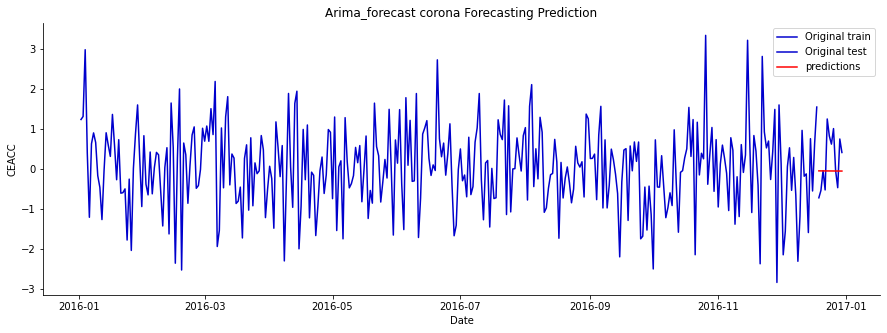

In [ ]:
arima_predictions(train_data_arima,test_data_arima,0,1,1)

##Prophet Model

In [ ]:
prophet_data=sensors_df.copy()
prophet_data.head()

,Date,CEACC,CEACC_diff
0,2016-01-01,0.000000,NaN
1,2016-01-02,1.232260,1.232260
2,2016-01-03,2.540129,1.307869
3,2016-01-04,5.520271,2.980142
4,2016-01-05,5.914298,0.394027


In [ ]:
train_df= prophet_data[:-12]
test_df=prophet_data[-12:]
train_confirmed= pd.DataFrame()
train_confirmed['ds'] = train_df['Date']
train_confirmed['y']= train_df['CEACC']
model = Prophet()
model.fit(train_confirmed)
future_dates = model.make_future_dataframe(periods=24)
prediction = model.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


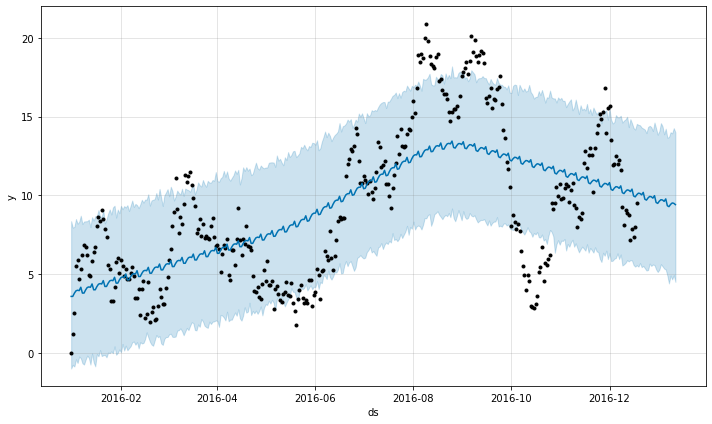

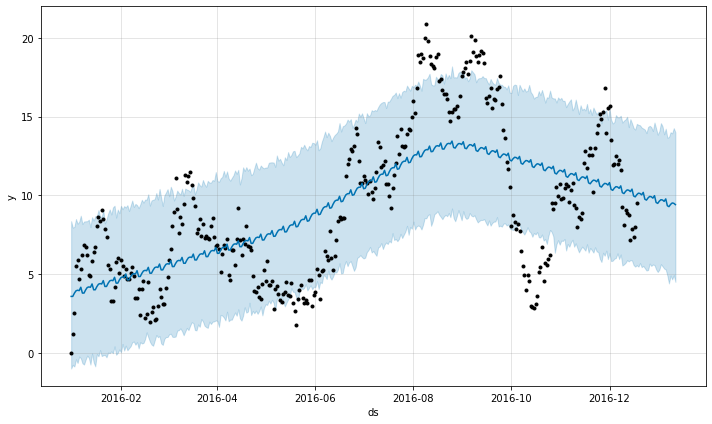

In [ ]:
# Plot Our Prediction
model.plot(prediction)

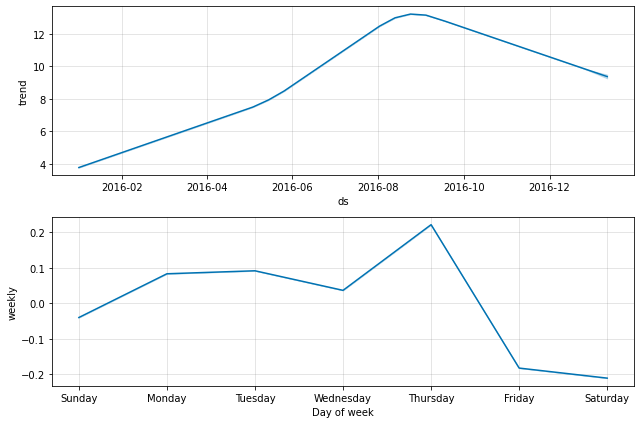

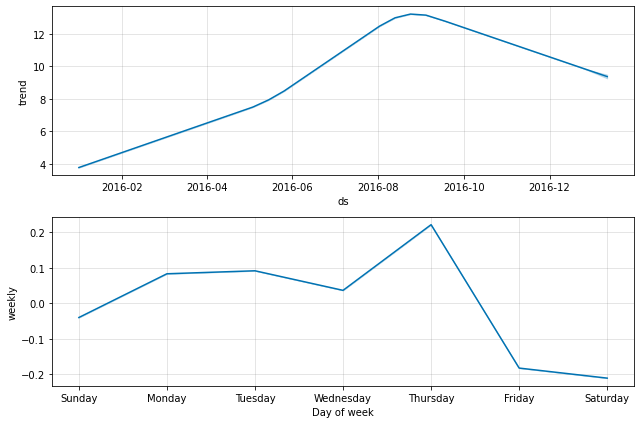

In [ ]:
# Visualize Each Component [Trends,Weekly]
model.plot_components(prediction)



RMSE: 1.6056105457413614
MAE: 1.4425257990673483
R2 Score: -0.23135150911970603


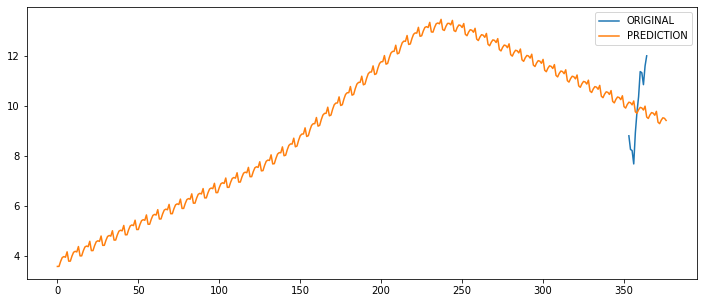

In [ ]:

rmse = np.sqrt(mean_squared_error(test_df.CEACC[-12:], prediction.yhat[-12:]))
mae = mean_absolute_error(test_df.CEACC[-12:], prediction.yhat[-12:])
r2 = r2_score(test_df.CEACC[-12:], prediction.yhat[-12:])
example_dict = {}
example_dict['Prophet'] = [rmse, mae, r2]
test_df['CEACC'].plot(legend=True,label='ORIGINAL',figsize=(12,5));
prediction['yhat'].plot(legend=True,label='PREDICTION'); 
pickle_out = open("prophet_model_scores.p","wb")
pickle.dump(example_dict, pickle_out)
pickle_out.close()
pickle_in = open("prophet_model_scores.p","rb")
example_dict = pickle.load(pickle_in)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

In [ ]:

pickle_in = open("prophet_model_scores.p","rb")
prophet_dict = pickle.load(pickle_in)
print(prophet_dict)

{'Prophet': [1.6056105457413614, 1.4425257990673483, -0.23135150911970603]}


##Holt Winter Model

In [ ]:
holt_data=sensors_df.copy()
holt_data.head()

,Date,CEACC,CEACC_diff
0,2016-01-01,0.000000,NaN
1,2016-01-02,1.232260,1.232260
2,2016-01-03,2.540129,1.307869
3,2016-01-04,5.520271,2.980142
4,2016-01-05,5.914298,0.394027


In [ ]:
def holt(data,model_name):
  train_data=data[:-12]       
  test_data =data[-12:]
  train_data.drop(columns='Date',inplace=True)
  test_data.drop(columns='Date',inplace=True)
  holt_data['Double ES'] = ExponentialSmoothing(holt_data['CEACC'].astype(float),trend='add').fit().fittedvalues
  #holt_data[['Confirmed','Triple ES']].plot(figsize=(12,5))
  fitted_model = ExponentialSmoothing(train_data['CEACC'].astype(float),trend='add').fit()
  test_predictions= fitted_model.forecast(12).rename(f'{model_name} Forecast')
  train_data['CEACC'].plot(figsize=(12,5),legend=True,label='Train')
  test_data['CEACC'].plot(legend=True,label='Test',figsize=(12,5));
  test_predictions.plot(legend=True,label='Prediction');  
  get_scores_holt(test_data['CEACC'],test_predictions,model_name)   

In [ ]:
def get_scores_holt(test_data,predictions,model_name):
  model_name_dict = {}
  #model_scores = {}
  rmse = np.sqrt(mean_squared_error(test_data,predictions))
  mae = mean_absolute_error(test_data,predictions)
  r2 = r2_score(test_data,predictions)
  #model_scores['Holt Winter'] = [rmse, mae, r2]
  model_name_dict[f'{model_name}'] = [rmse, mae, r2]
  pickle_out = open(f'{model_name}_model_scores.p',"wb")    
  pickle.dump(model_name_dict, pickle_out)                    
  pickle_out.close()
  pickle_in = open(f'{model_name}_model_scores.p',"rb")         
  model_name_dict = pickle.load(pickle_in)
  print(model_name_dict)
  print(f"RMSE: {rmse}")
  print(f"MAE: {mae}")
  print(f"R2 Score: {r2}")
 # pickle.dump(model_scores, open( "Holt_model_scores.p", "wb" ))

{'Holt': [1.3859671242452964, 1.254009442291883, 0.0824970262227992]}
RMSE: 1.3859671242452964
MAE: 1.254009442291883
R2 Score: 0.0824970262227992


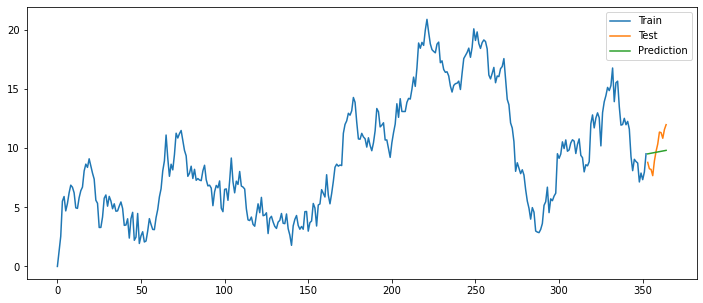

In [ ]:
holt(holt_data,'Holt')

In [ ]:
pickle_in = open("Holt_model_scores.p","rb")      #Prasanta - this seems to be logical as same operation can be applied
holtwinter_dict = pickle.load(pickle_in)          #to all other forecasting models in the similar way
print(holtwinter_dict)

{'Holt': [1.3859671242452964, 1.254009442291883, 0.0824970262227992]}


##**Create Results Dataframe**

In [ ]:
def create_results_df():
    results_dict = pickle.load(open("model_scores.p", "rb"))
    
    
    results_dict.update(pickle.load(open("arima_model_scores.p", "rb")))

    #results_dict.update(pickle.load(open("sarimax_model_scores.p", "rb")))


    results_dict.update(pickle.load(open("prophet_model_scores.p", "rb")))

    results_dict.update(pickle.load(open("Holt_model_scores.p", "rb")))

    restults_df = pd.DataFrame.from_dict(results_dict, orient='index', 
                                        columns=['RMSE', 'MAE','R2'])
    
    restults_df = restults_df.sort_values(by='RMSE', ascending=False).reset_index()
    
    return restults_df
    create_results_df.to_csv('confirmed_index_df.csv')

In [ ]:
results = create_results_df()
results

,index,RMSE,MAE,R2
0,Prophet,1.605611,1.442526,-0.231352
1,XGBoost,1.603866,1.376615,-0.228677
2,LSTM,1.596863,1.252336,-0.217971
3,LinearRegression,1.497935,1.239803,-0.071736
4,RandomForest,1.487937,1.209948,-0.057476
5,Holt,1.385967,1.254009,0.082497
6,ARIMA,0.706604,0.604105,-0.160519


In [ ]:
results.to_csv('sensors_index.csv')

 **Plot Results**

In [ ]:
def plot_results(results_df):
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.lineplot(np.arange(len(results_df)), 'RMSE', data=results_df, ax=ax, 
                 label='RMSE', color='mediumblue')
    sns.lineplot(np.arange(len(results_df)), 'MAE', data=results_df, ax=ax, 
                 label='MAE', color='Cyan')
    sns.lineplot(np.arange(len(results_df)), 'R2', data=results_df, ax=ax, 
                 label='R2', color='Green')
    
    plt.xticks(np.arange(len(results_df)),rotation=45)
    ax.set_xticklabels(results_df['index'])
    ax.set(xlabel = "Model",
           ylabel = "Scores",
           title = "Model Error Comparison")
    sns.despine()
plt.savefig(f'/content/models_forecast.png')

<Figure size 432x288 with 0 Axes>

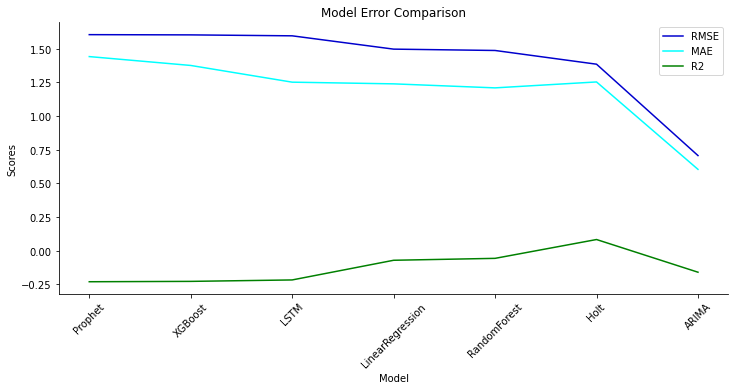

In [ ]:
plot_results(results)

In [ ]:
#plt.savefig('results_forecast.png')

In [ ]:
average_senors_cases=  9.237768426791225
gboost = 1.603866
percentage_off = round(gboost/average_senors_cases*100, 2)

print(f"With XGBoost, prediction is within {percentage_off}% of the actual.")

With XGBoost, prediction is within 17.36% of the actual.
